<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/Iris_dataset_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
from sklearn.datasets import load_iris
df = sns.load_dataset("iris")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


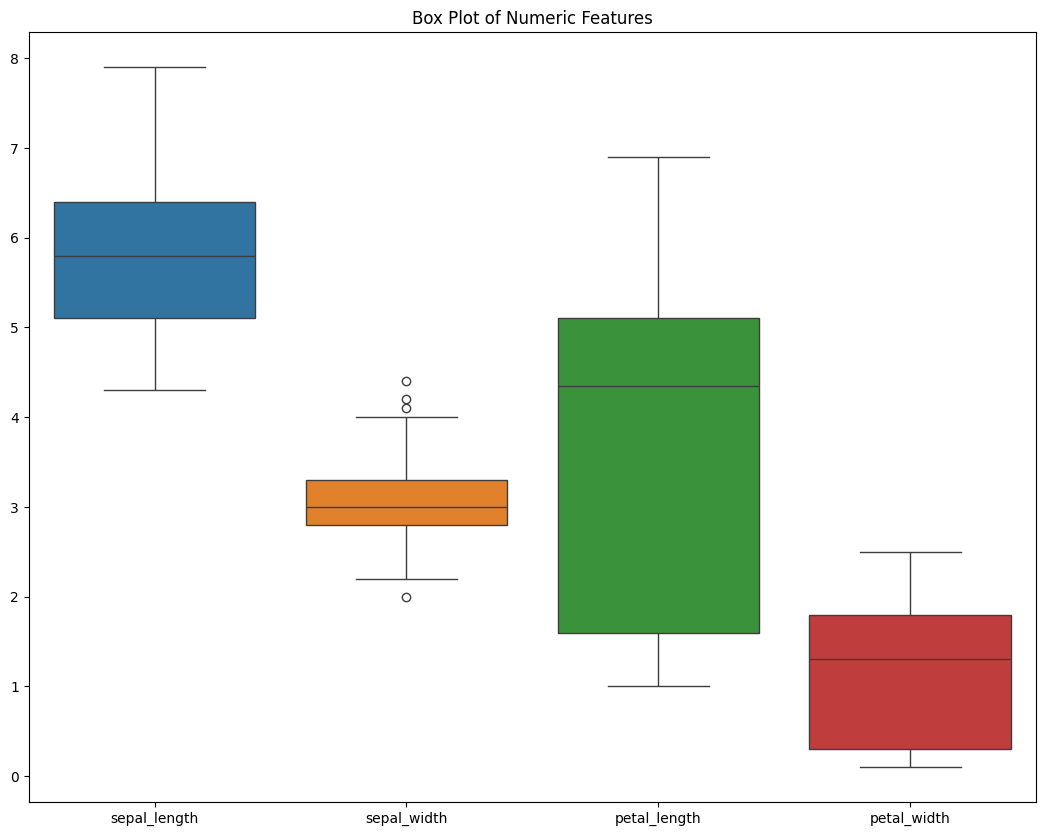

In [41]:
numeric_features = ["sepal_length","sepal_width","petal_length","petal_width"]
plt.figure(figsize=(13,10))
sns.boxplot(data=df[numeric_features])
plt.title("Box Plot of Numeric Features")
plt.show()

From the boxplot above we can see there are outliers in the sepal_width column.

In [42]:
#Apply IQR in "sepal_width" column
Q1 = df["sepal_width"].quantile(0.25)
Q3 = df["sepal_width"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [43]:
# remove outliers (outliers removal method:- 01)
df_outliers = df[(df["sepal_width"] < lower_bound) | (df["sepal_width"] > upper_bound)]
df_outliers_free = df[(df["sepal_width"] >= lower_bound) & (df["sepal_width"] <= upper_bound)]

In [44]:
#Cap outliers ( outliers removal method:- 02)
df_copy = df.copy()
df_copy["sepal_width"] = df_copy["sepal_width"].clip(lower_bound,upper_bound)

In [45]:
#Log transformation ( outliers removal method:- 03)
df_copy1 = df.copy()
df_copy1["sepal_width"] = np.log(df_copy1["sepal_width"]+1)

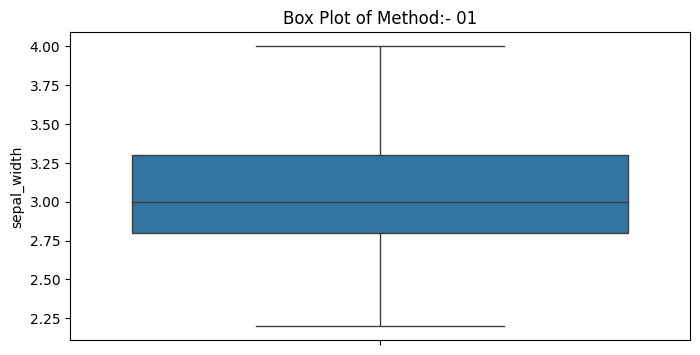

In [46]:
# boxplot after outliers removal method 01
plt.figure(figsize=(8,4))
sns.boxplot(data=df_outliers_free["sepal_width"])
plt.title("Box Plot of Method:- 01")
plt.show()

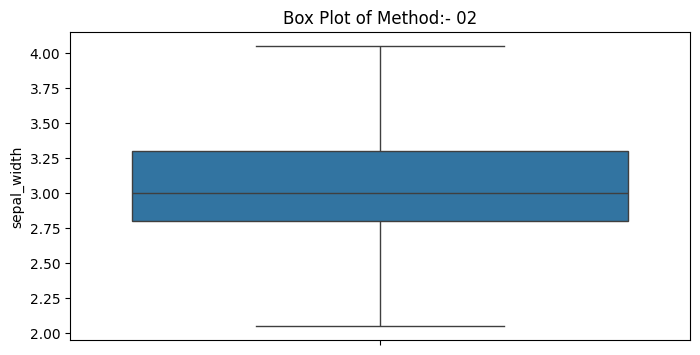

In [48]:
# boxplot after outliers removal method 02
plt.figure(figsize=(8,4))
sns.boxplot(data=df_copy["sepal_width"])
plt.title("Box Plot of Method:- 02")
plt.show()

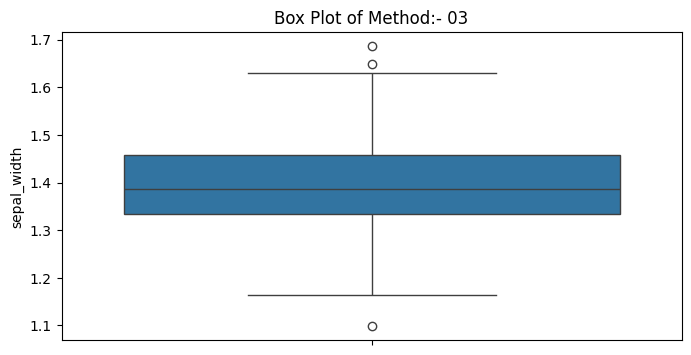

In [49]:
# boxplot after outliers removal method 03
plt.figure(figsize=(8,4))
sns.boxplot(data=df_copy1["sepal_width"])
plt.title("Box Plot of Method:- 03")
plt.show()

# What we worked on:
 * outliers detection using box plot
 * outliers handling ( using 3 methods )
    * method: 01 ( find outliers range using IQR and remove )
    * method: 02 ( cap outliers )
    * method: 03 ( log transformation )

Finally using bloxplot we can see we removed outliers successfully.


  